In [1]:
# Import the packages
import pandas as mypd
import matplotlib.pyplot as myplot
import seaborn as mysb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Import the dataset
mydata = mypd.read_csv('data/Logistic_Reg.csv')

In [15]:
# Explore the dataset
mydata.head()

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome
0,6.2,9.3,7.4,1
1,2.6,2.2,8.7,1
2,9.5,1.5,8.2,1
3,2.6,5.0,0.4,0
4,10.0,7.7,7.2,1


In [16]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ind_Exp_Act_Score  980 non-null    float64
 1   Tran_Speed_Score   980 non-null    float64
 2   Peer_Comb_Score    980 non-null    float64
 3   Outcome            980 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 30.8 KB


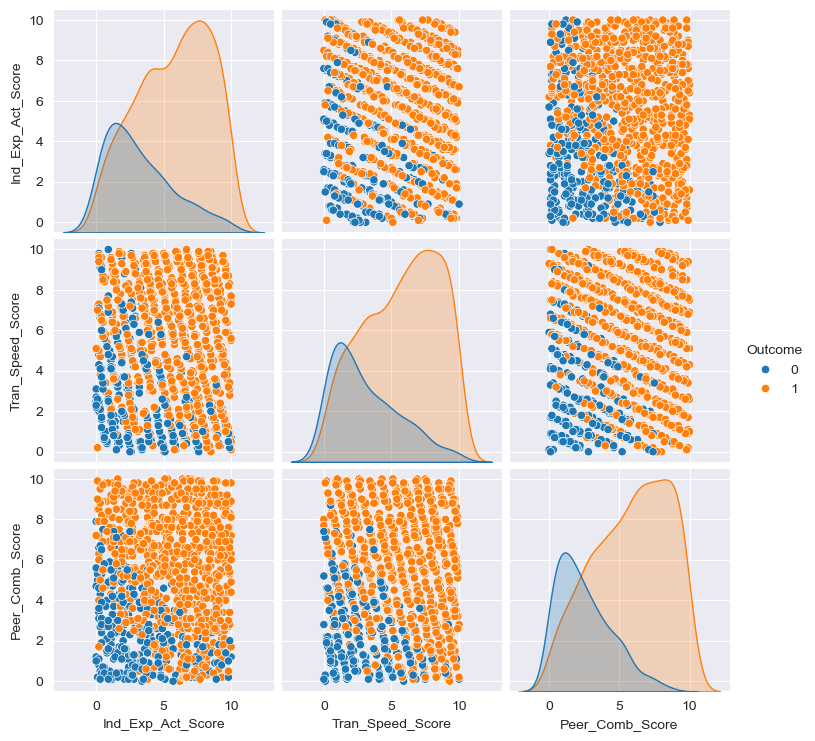

In [17]:
# Preliminary analysis
mysb.pairplot(mydata, hue= 'Outcome')
myplot.show()

In [18]:
# Separate x's and y
x = mydata.iloc[:, 0:3]
y = mydata.Outcome

In [19]:
# Specify the model
mymodel = LogisticRegression(C = 1e08) #Choose c as large
mymodel

LogisticRegression(C=100000000.0)

In [20]:
# Fit the model to the data
mymodel = mymodel.fit(x,y)
mymodel

LogisticRegression(C=100000000.0)

In [21]:
# Model Intercept
mymodel.intercept_

array([-35.48458999])

In [22]:
# Model Coefficients
mymodel.coef_

array([[2.79386068, 2.75153176, 3.51343922]])

In [23]:
# Model accuracy
accuracy = mymodel.score(x,y)
round(accuracy*100,2)

97.14

In [24]:
# Predicted probabilities
predprob = mymodel.predict_proba(x)
predprob

array([[3.10862447e-15, 1.00000000e+00],
       [2.24875476e-04, 9.99775125e-01],
       [3.79563048e-11, 1.00000000e+00],
       ...,
       [9.99593988e-01, 4.06011695e-04],
       [9.99901213e-01, 9.87870483e-05],
       [9.24176029e-01, 7.58239706e-02]])

In [25]:
# Predicted class or category
predclass = mymodel.predict(x)
predclass

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [26]:
# Actual vs Predicted table
mytable = mypd.crosstab(y, predclass)

In [39]:
mytable

col_0,0,1
Outcome,,
0,257,14
1,14,695


In [27]:
predclass = mypd.DataFrame(predclass, columns= ["Predicted Class"])
predclass

,Predicted Class
0,1
1,1
2,1
3,0
4,1
...,...
975,0
976,1
977,0
978,0


In [28]:
predprob = mypd.DataFrame(predprob, columns= ["Predicted 0", "Predicted = 1"])
predprob

,Predicted 0,Predicted = 1
0,3.108624e-15,1.000000
1,2.248755e-04,0.999775
2,3.795630e-11,1.000000
3,9.999979e-01,0.000002
4,0.000000e+00,1.000000
...,...,...
975,9.531311e-01,0.046869
976,1.554312e-15,1.000000
977,9.995940e-01,0.000406
978,9.999012e-01,0.000099


In [29]:
# Combine output with data
myresult = mydata.join(predclass)
myresult

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome,Predicted Class
0,6.2,9.3,7.4,1,1
1,2.6,2.2,8.7,1,1
2,9.5,1.5,8.2,1,1
3,2.6,5.0,0.4,0,0
4,10.0,7.7,7.2,1,1
...,...,...,...,...,...
975,6.7,2.7,1.8,0,0
976,8.3,9.7,5.6,1,1
977,2.3,0.7,5.5,0,0
978,0.9,4.8,3.0,0,0


In [30]:
myresult = myresult.join(predprob)

In [60]:
round(myresult.head(15),4)

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome,Predicted Class,Predicted 0,Predicted = 1
0,6.2,9.3,7.4,1,1,0.0000,1.0000
1,2.6,2.2,8.7,1,1,0.0002,0.9998
2,9.5,1.5,8.2,1,1,0.0000,1.0000
3,2.6,5.0,0.4,0,0,1.0000,0.0000
4,10.0,7.7,7.2,1,1,0.0000,1.0000
5,0.2,2.3,3.4,0,0,1.0000,0.0000
6,2.5,2.8,4.6,0,0,0.9904,0.0096
7,0.4,1.6,5.3,0,0,1.0000,0.0000
8,0.2,9.8,0.8,0,0,0.9942,0.0058
9,8.9,6.1,9.2,1,1,0.0000,1.0000


In [32]:
# Generalizability check - Cross validation
myscore = cross_val_score(mymodel, x, y, scoring= 'accuracy', cv = 5)
myscore

array([0.94387755, 0.96428571, 0.98469388, 0.96938776, 0.9744898 ])

In [33]:
cv_accuracy = myscore.mean()
round(cv_accuracy*100,2)

96.73

In [34]:
#Getting Confusion matrix by the package 'confusion matrix' from sklearn
mymatrix = confusion_matrix(y, predclass)

In [35]:
print(mymatrix)

[[257  14]
 [ 14 695]]


In [39]:
myreport = classification_report(y, predclass)

In [41]:
print(myreport)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       271
           1       0.98      0.98      0.98       709

    accuracy                           0.97       980
   macro avg       0.96      0.96      0.96       980
weighted avg       0.97      0.97      0.97       980

